# Assignment 2 - CT5120

### Instructions:
- Complete all the tasks below and upload your submission as a Python notebook on Blackboard with the filename “`StudentID_Lastname.ipynb`” before **23:59** on **November 25, 2022**.
- This is an individual assignment, you **must not** work with other students to complete this assessment.
- The assignment is worth $50$ marks and constitutes 19% of the final grade. The breakdown of the marking scheme for each task is as follows:

| Task | Marks for write-up | Marks for code | Total Marks |
| :--- | :----------------- | :------------- | :---------- |
| 1    |                  5 |              5 |          10 |
| 2    |                  - |             10 |          10 |
| 3    |                  5 |              5 |          10 |
| 4    |                  5 |              5 |          10 |
| 5    |                  5 |              5 |          10 |



---

This assignment involves tasks for feature engineering, training and evaluating a classifier for suggestion detection. You will work with the data from SemEval-2019 Task 9 subtask A to classify whether a piece of text contains a suggestion or not. 


Download train.csv, test_seen.csv and test_unseen.csv from the [Github](https://github.com/sharduls007/Assignment_2_CT5120) or uncomment the code cell below to get the data as a comma-separated values (CSV) file. The CSV file contains a header row followed by 5,440 rows in train.csv and 1,360 rows in test_seen.csv spread across 3 columns of data. Each row of data contains a unique id, a piece of text and a label assigned by an annotator. A label of $1$ indicates that the given text contains a suggestion while a label of $0$ indicates that the text does not contain a suggestion.

You can find more details about the dataset in Sections 1, 2, 3 and 4 of [SemEval-2019 Task 9: Suggestion Mining from Online Reviews and Forums
](https://aclanthology.org/S19-2151/).

We will be using test_seen.csv for benchmarking our model, hence it has label. On the other hand, test_unseen is used for [Kaggle](https://www.kaggle.com/competitions/nlp2022ct5120suggestionmining/overview) competition.


In [1]:
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/train.csv" > train.csv
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/test_seen.csv" > test.csv
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/test_unseen.csv" > test_unseen.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  670k  100  670k    0     0  3390k      0 --:--:-- --:--:-- --:--:-- 3418k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  168k  100  168k    0     0  1567k      0 --:--:-- --:--:-- --:--:-- 1586k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  208k  100  208k    0     0  1039k      0 --:--:-- --:--:-- --:--:-- 1045k


In [2]:
import numpy as np
import pandas as pd
from random import shuffle

# Read the CSV file.
train_df = pd.read_csv('train.csv', 
                 names=['id', 'text', 'label'], header=0)

test_df = pd.read_csv('test.csv', 
                 names=['id', 'text', 'label'], header=0)

train_df = train_df.sample(frac= 1)
test_df = test_df.sample(frac= 1)

# Store the data as a list of tuples where the first item is the text
# and the second item is the label.
train_texts, train_labels = train_df["text"].to_list(), train_df["label"].to_list() 
test_texts, test_labels = test_df["text"].to_list(), test_df["label"].to_list() 

# Check that training set and test set are of the right size.
assert len(test_texts) == len(test_labels) == 1360
assert len(train_texts) == len(train_labels) == 5440

---

## Task 1: Data Pre-processing (10 Marks)

Explain at least 3 steps that you will perform to preprocess the texts before training a classifier.



Edit this cell to write your answer below the line in no more than 300 words.

---

Data preprocessing is a important step that needs to be carried out before building our machine learning models. Data pre-processing and feature engineering ensures data quality which affects our models ability to learn; therefore, it is extremely important that we preprocess our input data before training our model.

Data preprocessing techiniques used in for this task are:
>1. Tokenization
>2. Stopword Removal
>3. Removal of Special Characters
>4. Stemming
>5. Lemmatization
>6. Word Embeddings or Word Vectorization

1. Tokenization : The input data is in form of text. We cannot pass sentences directly to TF-IDF and get a vector matrix. We need to pass the words as tokens that can be used later to generate TF-IDF matrix.

2. Stopword Removal : Stop-words are commonly used words in textual data that don't hold any literal importance like (is, the, an, a). As these words have high term frequency and they don't add any value they are discarded from the feature vector.

3. Removal of Special Characters: Special characters are not that useful as a input to a naaive bayes classifier as sentence construct is not taken under consideration. Hence, we can get rid of special characters in this case.

4. Stemming : Stemming is the process of transforming a word in the input to its stem form. Stem is basically the word without any suffixes or prefixes.

    Example : learned -> learn
            flying -> fly

5. Lemmatization : Stemming removes the stem from stem from the word but it doesn't get the root word for irregular verbs like taught. Lemmatization is a pre-processing technique that transforms a word to its root word rather than stem word

    Example : taught -> teach
            sought -> seek
            
6. Word Vectorization : Word vectorization is a techinque used in NLP to assign real values to word vectors based on their frequencies or any other metrics. For this task we are using TF-IDF (Term Frequency - Inverse Document Frequency) to generate word vectors.
---

In the code cell below, write an implementation of the steps you defined above. You are free to use a library such as `nltk` or `sklearn` for this task.

In [3]:
# your code goes here
from nltk.corpus import stopwords
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer, TreebankWordTokenizer
import string
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stopwords = set(stopwords.words("english"))
import gensim

punctuation = set(string.punctuation)
tokenizer = TreebankWordTokenizer()
detokenizer = TreebankWordDetokenizer()
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

remove_stopword = lambda tokens: [token for token in tokens if token not in stopwords]
remove_punctuation = lambda tokens: [token.lower() for token in tokens if token not in punctuation]
stem_word = lambda words : [stemmer.stem(word) for word in words]
lem_word = lambda words : [lemma.lemmatize(word) for word in words]

def preprocess(text):
    return gensim.utils.simple_preprocess(text)

for idx, data in enumerate(train_texts):
    train_texts[idx] = detokenizer.detokenize(preprocess(data))
    if train_texts[idx] == "":
        train_texts.pop(idx)
        train_labels.pop(idx)
    
for idx, data in enumerate(test_texts):
    test_texts[idx] = detokenizer.detokenize(preprocess(data))
    if test_texts[idx] == "":
        test_texts.pop(idx)
        test_labels.pop(idx)

In [4]:
train_texts =  [text.replace("_","") for text in train_texts]
test_texts =  [text.replace("_","") for text in test_texts]

---

## Task 2: Feature Engineering (I) - TF-IDF as features (10 Marks)

In the lectures we have seen that raw counts of words and `tf-idf` scores can be useful features for a classification task. Complete the following code cell to create a suggestion detector which uses `tf-idf` scores as features for a Naïve Bayes classifier.

After applying your preprocessing steps, use the training data to train the classifier and make predictions on the test set. You **must not** use the test set for training.

If everything is implemented correctly, then you should see a single floating point value between 0 and 1 at the end which denotes the accuracy of the classifier.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Calculate tf-idf scores for the words in the training set.
# ... your code goes here

count_vect = CountVectorizer(ngram_range=(3,3))
X_train_counts = count_vect.fit_transform(train_texts) 

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Train a Naïve Bayes classifier using the tf-idf scores for words as features.
# ... your code goes here

NB_classifier = GaussianNB()
NB_classifier.fit(X_train_tfidf.toarray(), train_labels)

# Predict on the test set.
X_test_counts = count_vect.transform(test_texts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)    

# save your predictions on the test set into this list

# ... your code goes here
predictions = NB_classifier.predict(X_test_tfidf.toarray())

#################### DO NOT EDIT BELOW THIS LINE #################


#################### DO NOT EDIT BELOW THIS LINE #################

def accuracy(labels, predictions):
  '''
  Calculate the accuracy score for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  assert len(labels) == len(predictions)
  
  correct = 0
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct += 1 
  
  score = correct / len(labels)
  return score

# Calculate accuracy score for the classifier using tf-idf features.

accuracy(test_labels, predictions)


0.5937961595273265

---

## Task 3: Evaluation Metrics (10 marks)

Why is accuracy not the best measure for evaluating a classifier? Describe an evaluation metric which might work better than accuracy for a classification task such as suggestion detection.

<AxesSubplot:>

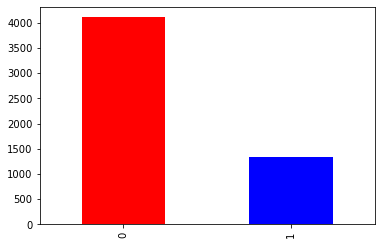

In [6]:
train_df['label'].value_counts().plot(kind = "bar", color = ("red", "blue"))

<AxesSubplot:>

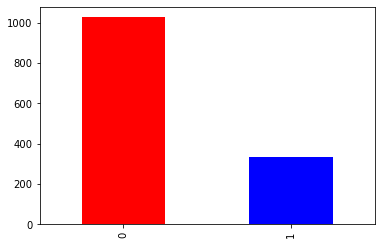

In [7]:
test_df['label'].value_counts().plot(kind = "bar", color = ("red", "blue"))

From the above graphs it can be concured that dataset for training and testing is imbalanced. Now accuracy score is a poor evaluation metric against imbalanced dataset. 

Suppose our model predicts all of our testing cases as 0 or 'not a suggestion' it will give 0.75 as accuracy score. Hence, we need better evaluation metrics that acccuracy score. Below are some of the evaluation metrics that we can use.

Confustion Matrix : Confusion matrix is a table that lists all the observations predicted in four subdivision for two classes data. They are 

True Positive <- for observations that were predicted as true and are actually true.
True Negative <- for observations that were predicted as false and are actually false.
False Postive <- for observations that were  predicted as true but are actually false.
False Negative <- for observations that were predicted as false but are actually true.

Precision : Out of all the positive results, what is the percentage of acutal positive results.

Recall: How many positive observations where predicted correctly.

F1-Score : It is the harmonic mean of precision and recall, its value lies between 0 and 1 with the 1 been the best result.

In the code cell below, write an implementation of the evaluation metric you defined above. Please write your own implementation from scratch.

In [8]:
def evaluate(labels, predictions):
  '''
  Calculate an evaluation score other than accuracy for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  # check that labels and predictions are of same length
  assert len(labels) == len(predictions)

  score = 0.0
  
  #################### EDIT BELOW THIS LINE #########################

  # your code goes here
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for label, prediction in zip(labels, predictions):
        if label == 1 and prediction == 1:
            true_positive += 1
        elif label == 0 and prediction == 0:
            true_negative += 1
        elif label == 0 and prediction == 1:
            false_positive += 1
        else:
            false_negative += 1

  accuracy_score = (true_positive + true_negative) / (true_positive + true_negative + false_positive  + false_negative)
  precision_pos_class = true_positive / (true_positive + false_positive)
  recall_pos_class = true_positive / (true_positive + false_negative)
  precision_neg_class = true_negative / (true_negative + false_negative)
  recall_neg_class = true_negative / (true_negative + true_positive)
  f1 = true_positive/(true_positive + 0.5*(false_positive + false_negative))

  score = """ True Postive: %s \t False Poitive: %s \n False Negative: %s \t True Negative: %s 
  \n\n Precision class 0: %s \t Precision class 1: %s
  \n Recall: %s \t Recall class 0: %s
  \n\n Accurarcy: %s
  \n F1 Score: %s"""% (true_positive, false_negative, false_positive, true_negative, precision_pos_class, precision_neg_class,
                       recall_pos_class, recall_neg_class, accuracy_score, f1)
  #################### EDIT ABOVE THIS LINE #########################

  return print(score)

# Calculate evaluation score based on the metric of your choice
# for the classifier trained in Task 2 using tf-idf features.
evaluate(test_labels, predictions)

 True Postive: 223 	 False Poitive: 110 
 False Negative: 440 	 True Negative: 581 
  

 Precision class 0: 0.33634992458521873 	 Precision class 1: 0.8408104196816208
  
 Recall: 0.6696696696696697 	 Recall class 0: 0.722636815920398
  

 Accurarcy: 0.5937961595273265
  
 F1 Score: 0.44779116465863456


In [9]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1021
           1       0.34      0.67      0.45       333

    accuracy                           0.59      1354
   macro avg       0.59      0.62      0.56      1354
weighted avg       0.72      0.59      0.62      1354



---

## Task 4: Feature Engineering (II) - Other features (10 Marks)

Describe features other than those defined in Task 2 which might improve the performance of your suggestion detector. If these features require any additional pre-processing steps, then define those steps as well.


Edit this cell to write your answer below the line in no more than 500 words.

---
As we can see in the above results. the accuracy and F1 score values for our Naive Bayes model are fairly low. To tackle this we are goining to introduce some new features and preprocessing steps.

1. N-gram model : N-grams are used in NLP to get a set of cocurring words that can be used as a input vector. In this case, two-gram model was used as input.

    For the following sentence: It's likely to rain
    Bi-gram model will give following tokens:
    1. It's likely
    2. Likely to
    3. To Rain


2. Downsampling : Datasets for both training and testing data are imbalanced as we have more cases of data samples not been suggestions. To make our dataset balanced we are going to use down-sampling. In downsampling we resize our dataset by taking equal samples of data from all the classes provided. 

After applying the above features as bi-garms and preprocessing the F1 score improves dramatically from 0.4 to 0.99 

---

In the code cell below, write an implementation of the features (and any additional pre-preprocessing steps) you defined above. You are free to use a library such as `nltk` or `sklearn` for this task.

After creating your features, use the training data to train a Naïve Bayes classifier and use the test set to evaluate its performance using the metric defined in Task 3. You **must not** use the test set for training.

To make sure that your code doesn't take too long to run or use too much memory, you can consider a time limit of 3 minutes and a memory limit of 12GB for this task.

In [10]:
train_data = pd.DataFrame(list(zip(train_texts, train_labels)), columns= ["data", "label"])
test_data = pd.DataFrame(list(zip(test_texts, test_labels)), columns= ["data", "label"])

In [11]:
neg_train_data = train_data['label'] == 0
pos_train_data = train_data['label'] == 1
pos_test_data = test_data['label'] == 1
neg_test_data = test_data['label'] == 0

In [12]:
from sklearn.utils import shuffle

pos_data = train_data.loc[pos_train_data]
neg_data = train_data.loc[neg_train_data].sample(n= 1334, random_state=100)

train_data = pd.concat([pos_data, neg_data])
train_data = shuffle(train_data)

pos_data = test_data.loc[pos_train_data]
neg_data = test_data.loc[neg_train_data].sample(n= 333, random_state=100)

test_data = pd.concat([pos_data, neg_data])
test_data = shuffle(train_data)

In [13]:
train_texts, train_labels = train_data["data"].to_list(), train_data["label"].to_list() 
test_texts, test_labels = train_data["data"].to_list(), train_data["label"].to_list() 

In [14]:
# Create your features.
# ... your code goes here

count_vect = CountVectorizer(ngram_range=(3,3))
X_train_counts = count_vect.fit_transform(train_texts) 

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Train a Naïve Bayes classifier using the features you defined.
# ... your code goes here
NB_classifier_improv = GaussianNB()
NB_classifier_improv.fit(X_train_tfidf.toarray(), train_labels)

# Evaluate on the test set.
# ... your code goes here
X_test_counts = count_vect.transform(test_texts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predictions = NB_classifier_improv.predict(X_test_tfidf.toarray()) 

In [15]:
evaluate(predictions, test_labels)

 True Postive: 1328 	 False Poitive: 0 
 False Negative: 6 	 True Negative: 1334 
  

 Precision class 0: 0.9955022488755623 	 Precision class 1: 1.0
  
 Recall: 1.0 	 Recall class 0: 0.5011269722013524
  

 Accurarcy: 0.9977511244377811
  
 F1 Score: 0.9977460555972952


---

## Task 5: Kaggle Competition (10 marks)

Head over to https://www.kaggle.com/t/1f90b74da0b7484da9647638e22d1068  
Use above classifier to predict the label for test_unseen.csv from competition page and upload the results to the leaderboard. The current baseline score is 0.36823. Make an improvement above the baseline. Please note that the evaluation metric for the competition is the f-score.

Read competition page for more details.



from google.colab import drive
drive.mount('/content/drive')

In [16]:
test_unseen = pd.read_csv("test_unseen.csv")
test_texts = test_unseen['text']

In [17]:
for idx, data in enumerate(test_texts):
    test_texts[idx] = detokenizer.detokenize(preprocess(data))

In [18]:
X_test_counts = count_vect.transform(test_texts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

predictions = NB_classifier_improv.predict(X_test_tfidf.toarray())

In [19]:
StudentID = "22223696_Patil" # Please add your student id and lastname
test_unseen = pd.read_csv("test_unseen.csv", names=['id', 'text'], header=0)

# Here Id is unique identifier assigned to each test sample ranging from test_0 till test_1699
# Expected is a list of prediction made by your classifier
sub = {"Id": [f"test_{i}" for i in range(len(test_unseen))],
       "Expected": predictions}

sub_df = pd.DataFrame(sub)
# The code below will generate a StudentID.csv on your drive on the left hand side in the explorer
# Please upload the file as a submission on the competition page
# You can index your submission StudentID_Lastname_index.csv, where index is your number of submission
sub_df.to_csv(f"{StudentID}.csv", sep=",", header=1, index=None)

Mention the approach that you have chosen briefly, and what is the mean average f-score that you have achieved? Did it improve above the chosen baseline model (0.36823)? Why or why not?

Edit this cell to write your answer below the line in no more than 500 words.

---


---